# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords

import re
import string 

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer

import keras
from keras.preprocessing import text,sequence
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot

from collections import Counter

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB 
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score

# Load Dataset

## Dataset Fake and True News

In [2]:
news_data = pd.read_csv('datapercobaan4.csv', delimiter=",")

In [3]:
news_data.rename(columns = {"text": "title text"}, inplace=True)

In [4]:
news_data.head(5)

,Unnamed: 0,waktu,user,title text,STOP_REMOVAL,label
0,0,2021-11-25 10:22:37+00:00,triherlan,judul berita nya mantap tendang anwar abbas u...,judul berita nya mantap tendang anwar abbas u...,false
1,1,2021-11-25 10:22:35+00:00,fahadkanan,ceo formula alberto longgo menampik bhw jakar...,ceo formula alberto longgo menampik bhw jakar...,true
2,2,2021-11-25 10:22:35+00:00,jinkyukkk,iyahhh 2022 berita datings seokbeen xixixi,iyahhh 2022 berita datings seokbeen xixixi,false
3,3,2021-11-25 10:22:30+00:00,budiatnogr,terkait isu pemilihan vanue formula akan dite...,terkait isu pemilihan vanue formula ditentuka...,true
4,4,2021-11-25 10:22:29+00:00,beritartm,infografik bajet2022 dana khas bank negara unt...,infografik bajet2022 dana khas bank negara pmk...,true


In [5]:
news_datafinal = news_data[['title text','label']]

In [6]:
news_datafinal.head(5)

,title text,label
0,judul berita nya mantap tendang anwar abbas u...,false
1,ceo formula alberto longgo menampik bhw jakar...,true
2,iyahhh 2022 berita datings seokbeen xixixi,false
3,terkait isu pemilihan vanue formula akan dite...,true
4,infografik bajet2022 dana khas bank negara unt...,true


In [7]:
news_datafinal['label'].value_counts()

true         98
false        42
clickbait     1
Name: label, dtype: int64

In [8]:
#news_datafinal.drop(news_datafinal[news_datafinal['label'] == "true "].index, inplace = True)

In [9]:
#news_datafinal['label'].value_counts()

## Dataset Clickbait Detik News

In [10]:
clickbait_detiknews = pd.read_csv('annotated_detikNews.csv')

In [11]:
clickbait_detiknews.rename(columns = {"title": "title text"}, inplace=True)

In [12]:
clickbait_detiknews

,title text,label,label_score
0,"Masuk Radar Pilwalkot Medan, Menantu Jokowi Be...",non-clickbait,0
1,Malaysia Sudutkan RI: Isu Kabut Asap hingga In...,non-clickbait,0
2,Viral! Driver Ojol di Bekasi Antar Pesanan Mak...,clickbait,1
3,"Kemensos Salurkan Rp 7,3 M bagi Korban Kerusuh...",non-clickbait,0
4,"Terkait Mayat Bayi Mengenaskan di Tangerang, S...",non-clickbait,0
...,...,...,...
995,Gibran Rakabuming Angkat Bicara Soal Spandukny...,non-clickbait,0
996,Warga yang Terkena ISPA Akibat Karhutla Capai ...,non-clickbait,0
997,Ratusan Mahasiswa di Malang Tuntut Pencabutan ...,non-clickbait,0
998,"Rusuh di Jayapura: 1 Prajurit TNI Gugur, 6 Ang...",non-clickbait,0


In [13]:
clickbait_detiknews['label'].value_counts()

non-clickbait    890
clickbait        110
Name: label, dtype: int64

In [14]:
clickbait_detiknews.drop(clickbait_detiknews[clickbait_detiknews['label_score'] == 0].index, inplace = True)

In [15]:
clickbait_detiknews

,title text,label,label_score
2,Viral! Driver Ojol di Bekasi Antar Pesanan Mak...,clickbait,1
11,"Ada Motor Nyangkut di Atas Bambu di Sleman, Ko...",clickbait,1
13,Pesan Gamblang Poyuono Menolak Revisi UU KPK,clickbait,1
37,Detik-detik Lima Kendaraan Alami Kecelakaan Be...,clickbait,1
38,Kocak! Maling di Rumah Mewah Jakut Terekam CCT...,clickbait,1
...,...,...,...
945,"Heboh Timbangan Beras BPNT Berkurang, Ini Kata...",clickbait,1
951,Viral Cuitan 'Sekolah yang Pinter Biar Gajadi ...,clickbait,1
976,"Demo di Mana-mana, Jokowi Sedang Panggil Pejab...",clickbait,1
978,DPR Bakal Sahkan RUU Keamanan Siber 30 September?,clickbait,1


In [16]:
clickbaitdn_final = clickbait_detiknews[['title text','label']]

In [17]:
clickbaitdn_final.head(5)

,title text,label
2,Viral! Driver Ojol di Bekasi Antar Pesanan Mak...,clickbait
11,"Ada Motor Nyangkut di Atas Bambu di Sleman, Ko...",clickbait
13,Pesan Gamblang Poyuono Menolak Revisi UU KPK,clickbait
37,Detik-detik Lima Kendaraan Alami Kecelakaan Be...,clickbait
38,Kocak! Maling di Rumah Mewah Jakut Terekam CCT...,clickbait


## Dataset Clickbait Kompas

In [18]:
clickbait_kompas = pd.read_csv('annotated_kompas.csv')

In [19]:
clickbait_kompas.rename(columns = {"title": "title text"}, inplace=True)

In [20]:
clickbait_kompas

,title text,label,label_score
0,"Diduga Pasok Sabu di Anambas, Adik Wali Kota T...",non-clickbait,0
1,Wanita dengan Tubuh Berisi Terbukti Bikin Pria...,clickbait,1
2,Kronologi Lengkap Pemuda di Bandung Tusuk Gadi...,clickbait,1
3,Pemain Thailand Beri Hormat ke Suporter Indone...,non-clickbait,0
4,"Kualitas Udara di Pontianak Berbahaya, Dinas K...",non-clickbait,0
...,...,...,...
1495,"Peras Pembeli Narkoba hingga Rp 500 Juta, Tiga...",non-clickbait,0
1496,KPK Punya Kewenangan Menerbitkan SP3 dengan Ja...,non-clickbait,0
1497,BPK Janji Bakal Beberkan Audit Lahan dan Izin ...,non-clickbait,0
1498,Melihat Tren Busana Pria di Plaza Indonesia Me...,clickbait,1


In [21]:
clickbait_kompas['label_score'].value_counts()

0    1157
1     343
Name: label_score, dtype: int64

In [22]:
clickbait_kompas.drop(clickbait_kompas[clickbait_kompas['label_score'] == 0].index, inplace = True)

In [23]:
clickbait_kompas

,title text,label,label_score
1,Wanita dengan Tubuh Berisi Terbukti Bikin Pria...,clickbait,1
2,Kronologi Lengkap Pemuda di Bandung Tusuk Gadi...,clickbait,1
5,"Sarapan Bikin Ngantuk, Mitos atau Fakta?",clickbait,1
8,"Pikap Tabrak Rumah di Kebon Jeruk, 2 Penghuni ...",clickbait,1
10,"Unggah Foto Bersama Habibie, Syahrini: Semoga ...",clickbait,1
...,...,...,...
1477,Kucumbu Tubuh Indahku Wakili Indonesia di Osca...,clickbait,1
1481,"Gaji Lebih Rendah dari Anggota, Mengapa Zita A...",clickbait,1
1489,Cara Polisi Tindak Pelanggar Ganjil Genap Agar...,clickbait,1
1492,"Napoli Vs Liverpool, Tekad Tuan Rumah Kalahkan...",clickbait,1


In [24]:
clickbait_kompas = clickbait_kompas.head(100)

In [25]:
clickbaitkompas_final = clickbait_kompas[['title text','label']]

# Label Encoding

In [26]:
#Merging Dataset
dataset_news = pd.concat([news_datafinal, clickbaitdn_final, clickbaitkompas_final], ignore_index=True, sort=False)

In [27]:
dataset_news

,title text,label
0,judul berita nya mantap tendang anwar abbas u...,false
1,ceo formula alberto longgo menampik bhw jakar...,true
2,iyahhh 2022 berita datings seokbeen xixixi,false
3,terkait isu pemilihan vanue formula akan dite...,true
4,infografik bajet2022 dana khas bank negara unt...,true
...,...,...
347,"3 Kabar Terbaru Ria Irawan, Belajar Bicara hin...",clickbait
348,"Berbagai Reaksi Pelanggar Ganjil Genap, Coba S...",clickbait
349,4 Fakta Menarik Hari Pertama Ganjil Genap di J...,clickbait
350,"Penyakit TBC, dari Penyebab, Gejala, Pengobata...",clickbait


In [28]:
datasetnews = dataset_news.dropna()

In [29]:
datasetnews['label'].value_counts()

clickbait    211
true          98
false         42
Name: label, dtype: int64

In [30]:
datasetnews

,title text,label
0,judul berita nya mantap tendang anwar abbas u...,false
1,ceo formula alberto longgo menampik bhw jakar...,true
2,iyahhh 2022 berita datings seokbeen xixixi,false
3,terkait isu pemilihan vanue formula akan dite...,true
4,infografik bajet2022 dana khas bank negara unt...,true
...,...,...
347,"3 Kabar Terbaru Ria Irawan, Belajar Bicara hin...",clickbait
348,"Berbagai Reaksi Pelanggar Ganjil Genap, Coba S...",clickbait
349,4 Fakta Menarik Hari Pertama Ganjil Genap di J...,clickbait
350,"Penyakit TBC, dari Penyebab, Gejala, Pengobata...",clickbait


## Dataset News 2

In [31]:
datasetnews2 = pd.read_csv('dataset_news2.csv')
datasetnews2

,Unnamed: 0,title text,label
0,0,RT @GoRiauCom: Pelaku Pemukulan Brutal Terhada...,true
1,1,RT @arifudinnn48: Panglima Didukung Segera Tum...,true
2,2,CCIPP tingkatkan kualitas SDM untuk dukung IKN...,true
3,3,Survei SMRC: Kepuasan pada Kerja Jokowi Naik J...,true
4,4,RT @terbucinz: Erick Thohir ajak Puan Retno da...,true
...,...,...,...
196,196,: Surat Panggilan Wawancara Calon Pegawai Bank...,false
197,197,Lapangan Mustika Ratu di Bekasi Dijadikan Temp...,false
198,198,Bu Mega aja setuju PKI bangkit masak kalian en...,false
199,199,Valid! Jokowi Menjual Indonesia,false


In [32]:
datasetnews2['label'].value_counts()

false        151
true          48
clickbait      2
Name: label, dtype: int64

In [33]:
datasetnews2 = datasetnews2[['title text', 'label']]

In [34]:
#Merging Dataset
datasetfinal = pd.concat([datasetnews,datasetnews2], ignore_index=True, sort=False)

In [35]:
datasetfinal['label'].value_counts()

clickbait    213
false        193
true         146
Name: label, dtype: int64

In [36]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
datasetfinal['label_score']= label_encoder.fit_transform(datasetfinal['label'])

In [37]:
datasetfinal

,title text,label,label_score
0,judul berita nya mantap tendang anwar abbas u...,false,1
1,ceo formula alberto longgo menampik bhw jakar...,true,2
2,iyahhh 2022 berita datings seokbeen xixixi,false,1
3,terkait isu pemilihan vanue formula akan dite...,true,2
4,infografik bajet2022 dana khas bank negara unt...,true,2
...,...,...,...
547,: Surat Panggilan Wawancara Calon Pegawai Bank...,false,1
548,Lapangan Mustika Ratu di Bekasi Dijadikan Temp...,false,1
549,Bu Mega aja setuju PKI bangkit masak kalian en...,false,1
550,Valid! Jokowi Menjual Indonesia,false,1


In [38]:
datasetfinal['label_score'].value_counts()

0    213
1    193
2    146
Name: label_score, dtype: int64

# Dataset Visualization

0    213
1    193
2    146
Name: label_score, dtype: int64


C:\Users\Lenovo\anaconda\envs\tenserflow_Env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


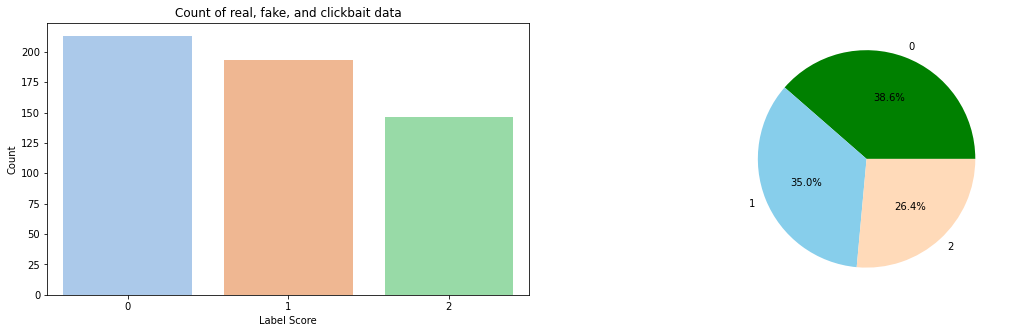

In [39]:
print(datasetfinal["label_score"].value_counts())
fig, ax = plt.subplots(1,2, figsize=(19, 5))
g1 = sns.countplot(datasetfinal.label_score,ax=ax[0],palette="pastel");
g1.set_title("Count of real, fake, and clickbait data")
g1.set_ylabel("Count")
g1.set_xlabel("Label Score")
g2 = plt.pie(datasetfinal["label_score"].value_counts().values,explode=[0,0,0],labels=datasetfinal.label_score.value_counts().index, autopct='%1.1f%%',colors=['Green','SkyBlue','PeachPuff'])
plt.show()

# Data Cleaning

## Menghapus HTML

In [40]:
def hapus_html(text):
    from bs4 import BeautifulSoup
    bs = BeautifulSoup(text, "html.parser")
    return bs.get_text()

datasetfinal['title text']=datasetfinal['title text'].apply(hapus_html)

C:\Users\Lenovo\anaconda\envs\tenserflow_Env\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [41]:
datasetfinal['title text']

0       judul berita nya mantap tendang anwar abbas u...
1       ceo formula alberto longgo menampik bhw jakar...
2             iyahhh 2022 berita datings seokbeen xixixi
3       terkait isu pemilihan vanue formula akan dite...
4      infografik bajet2022 dana khas bank negara unt...
                             ...                        
547    : Surat Panggilan Wawancara Calon Pegawai Bank...
548    Lapangan Mustika Ratu di Bekasi Dijadikan Temp...
549    Bu Mega aja setuju PKI bangkit masak kalian en...
550                      Valid! Jokowi Menjual Indonesia
551    Selebaran Kupon Bazaar Beras Murah Bergambar W...
Name: title text, Length: 552, dtype: object

## Menghapus Punctuation

In [42]:
def remove_punctuations(text):
    text = re.sub(r'[^a-zA-z0-9]', ' ', str(text))
    text = re.sub(r'\b\w{1,2}\b', '', text)
    text = re.sub(r'\s\s+', ' ', text)
    return text


datasetfinal['title text']=datasetfinal['title text'].apply(remove_punctuations)
datasetfinal

,title text,label,label_score
0,judul berita nya mantap tendang anwar abbas u...,false,1
1,ceo formula alberto longgo menampik bhw jakar...,true,2
2,iyahhh 2022 berita datings seokbeen xixixi,false,1
3,terkait isu pemilihan vanue formula akan dite...,true,2
4,infografik bajet2022 dana khas bank negara unt...,true,2
...,...,...,...
547,Surat Panggilan Wawancara Calon Pegawai Bank ...,false,1
548,Lapangan Mustika Ratu Bekasi Dijadikan Tempat ...,false,1
549,Mega aja setuju PKI bangkit masak kalian enggak,false,1
550,Valid Jokowi Menjual Indonesia,false,1


## Case Folding

In [43]:
#Case Folding
def case_folding(text):
    return str.lower(text)

datasetfinal['title text']=datasetfinal['title text'].apply(case_folding)
datasetfinal

,title text,label,label_score
0,judul berita nya mantap tendang anwar abbas u...,false,1
1,ceo formula alberto longgo menampik bhw jakar...,true,2
2,iyahhh 2022 berita datings seokbeen xixixi,false,1
3,terkait isu pemilihan vanue formula akan dite...,true,2
4,infografik bajet2022 dana khas bank negara unt...,true,2
...,...,...,...
547,surat panggilan wawancara calon pegawai bank ...,false,1
548,lapangan mustika ratu bekasi dijadikan tempat ...,false,1
549,mega aja setuju pki bangkit masak kalian enggak,false,1
550,valid jokowi menjual indonesia,false,1


In [44]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [45]:
from nltk.corpus import stopwords
stop_words = stopwords.words('indonesian')

In [46]:
stop_words.extend(["iyahhh","xixixi","awaninews","awani745"])

In [47]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()
def removestopword_stemming(text):
    filter_sentence = []
    text = nltk.word_tokenize(text)
    
    for word in text:
        if word not in set(stop_words):
            factory = StemmerFactory()
            stemmer = factory.create_stemmer()
            filter_sentence.append(stemmer.stem(word))
    return " ".join(filter_sentence)

datasetfinal['title text']=datasetfinal['title text'].apply(removestopword_stemming)
datasetfinal

,title text,label,label_score
0,judul berita nya mantap tendang anwar abbas ul...,false,1
1,ceo formula alberto longgo tampik bhw jakarta ...,true,2
2,2022 berita datings seokbeen,false,1
3,kait isu pilih vanue formula tentu presiden te...,true,2
4,infografik bajet2022 dana khas bank negara pmk...,true,2
...,...,...,...
547,surat panggil wawancara calon pegawai bank ind...,false,1
548,lapang mustika ratu bekas jadi acara poster un...,false,1
549,mega aja tuju pki bangkit masak,false,1
550,valid jokowi jual indonesia,false,1


In [48]:
datasetfinal['label_score'].value_counts()

0    213
1    193
2    146
Name: label_score, dtype: int64

# Data Visualization

In [49]:
datasetfinal.rename(columns = {"title text": "judul_teks"}, inplace=True)

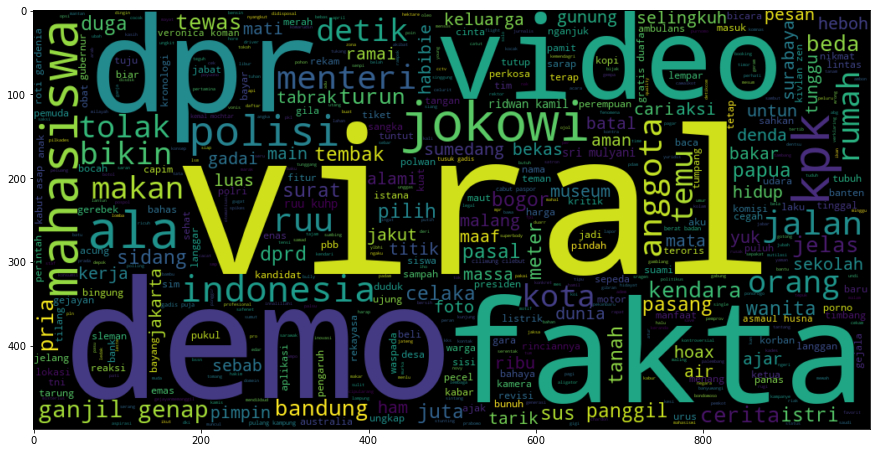

In [50]:
from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 500 , width = 1000 , height = 500 , stopwords = STOPWORDS).generate(" ".join(datasetfinal[datasetfinal.label_score == 0].judul_teks))
plt.imshow(wc , interpolation = 'bilinear')

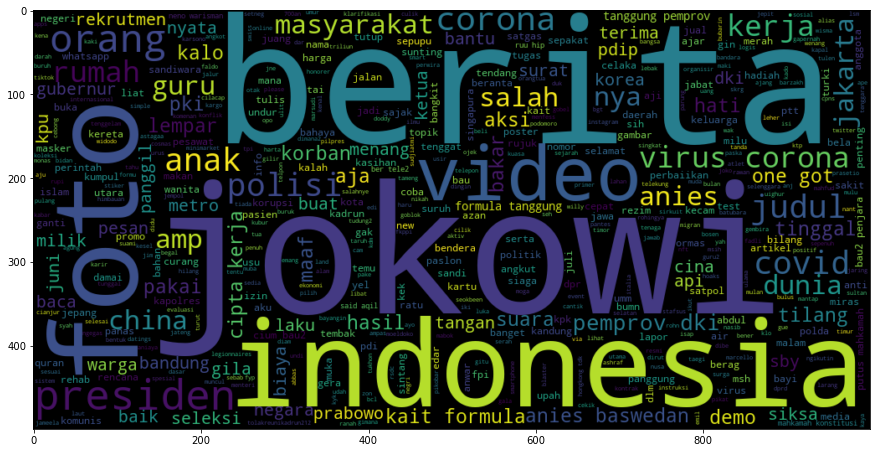

In [51]:
plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 500 , width = 1000 , height = 500 , stopwords = STOPWORDS).generate(" ".join(datasetfinal[datasetfinal.label_score == 1].judul_teks))
plt.imshow(wc , interpolation = 'bilinear')

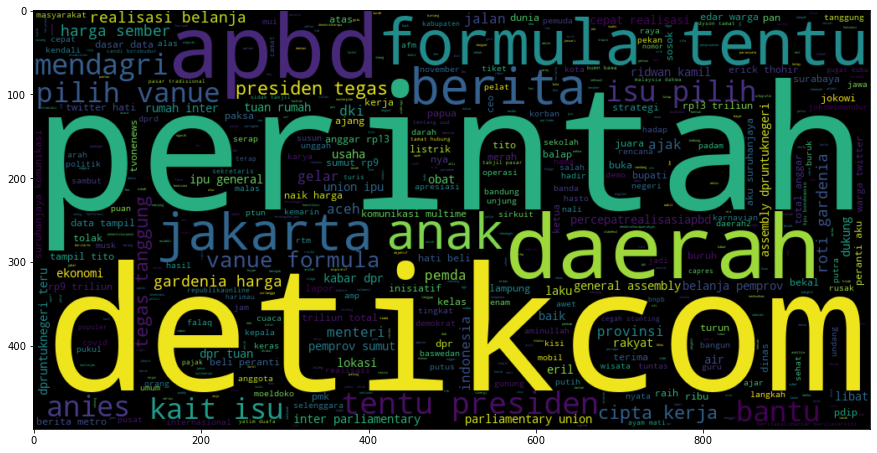

In [52]:
plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 500 , width = 1000 , height = 500 , stopwords = STOPWORDS).generate(" ".join(datasetfinal[datasetfinal.label_score == 2].judul_teks))
plt.imshow(wc , interpolation = 'bilinear')

In [53]:
datasetfinal.head(5)

,judul_teks,label,label_score
0,judul berita nya mantap tendang anwar abbas ul...,false,1
1,ceo formula alberto longgo tampik bhw jakarta ...,true,2
2,2022 berita datings seokbeen,false,1
3,kait isu pilih vanue formula tentu presiden te...,true,2
4,infografik bajet2022 dana khas bank negara pmk...,true,2


In [54]:
datasetfinal['label_score'].value_counts()

0    213
1    193
2    146
Name: label_score, dtype: int64

In [55]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000,ngram_range=(2,2))
# TF-IDF feature matrix
X= tfidf_vectorizer.fit_transform(datasetfinal['judul_teks'])
X.shape

(552, 3319)

In [56]:
#Getting the target variable
y=datasetfinal['label_score']

In [57]:
print(f'Original dataset shape : {Counter(y)}')

Original dataset shape : Counter({0: 213, 1: 193, 2: 146})


In [58]:
## Divide the dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [60]:
#creating the objects
nb_cv=MultinomialNB(alpha=0.1) 
cv_dict = {0:'Naive Bayes'}
cv_models=[nb_cv]

#Printing the accuracy
for i,model in enumerate(cv_models):
    print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model, X, y, cv=10, scoring ='accuracy').mean()))

Naive Bayes Test Accuracy: 0.5397727272727273


In [61]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()
bebas = []
for index,row in datasetfinal.iterrows():
    sentence = row['judul_teks']
    words = nltk.word_tokenize(sentence)
    words = [stemmer.stem(word) for word in words if not word in stop_words]
    words = ' '.join(words)
    bebas.append(words)

In [62]:
bebas[1]

'ceo formula alberto longgo tampik bhw jakarta bayar kota nama dunia men'

In [63]:
#Setting up vocabulary size
voc_size=10000

#One hot encoding 
onehot_repr=[one_hot(words,voc_size)for words in bebas] 

In [64]:
#Setting sentence length
sent_length=5000

#Padding the sentences
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 1830 3816 9074]
 [   0    0    0 ... 7848 1089 9844]
 [   0    0    0 ... 2781  785 9843]
 ...
 [   0    0    0 ... 6577 8236 4714]
 [   0    0    0 ... 5670 7426 2300]
 [   0    0    0 ...  349 2173 9892]]


In [65]:
embedded_docs[1]

array([   0,    0,    0, ..., 7848, 1089, 9844])

In [66]:
#Creating the lstm model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Dropout(0.5))
model.add(LSTM(100)) #Adding 100 lstm neurons in the layer
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

#Compiling the model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 5000, 40)          400000    
_________________________________________________________________
dropout (Dropout)            (None, 5000, 40)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               56400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 456,501
Trainable params: 456,501
Non-trainable params: 0
_________________________________________________________________
None


In [67]:
len(embedded_docs),y.shape

(552, (552,))

In [68]:
# Converting the X and y as array
X_final=np.array(embedded_docs)
y_final=np.array(y)

#Check shape of X and y final
X_final.shape,y_final.shape

((552, 5000), (552,))

In [69]:
# Train test split of the X and y final
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final)

# Fitting with 10 epochs and 64 batch size
history = model.fit(X_train,y_train,validation_split=0.3, epochs=6, batch_size=64, shuffle=True, verbose = 1)

Epoch 1/6
5/5 [==============================] - 35s 7s/step - loss: 0.0000e+00 - accuracy: 0.4118 - val_loss: 0.0000e+00 - val_accuracy: 0.3440
Epoch 2/6
5/5 [==============================] - 30s 6s/step - loss: 0.0000e+00 - accuracy: 0.4152 - val_loss: 0.0000e+00 - val_accuracy: 0.3440
Epoch 3/6
5/5 [==============================] - 32s 6s/step - loss: 0.0000e+00 - accuracy: 0.4152 - val_loss: 0.0000e+00 - val_accuracy: 0.3440
Epoch 4/6
5/5 [==============================] - 31s 7s/step - loss: 0.0000e+00 - accuracy: 0.4152 - val_loss: 0.0000e+00 - val_accuracy: 0.3440
Epoch 5/6
5/5 [==============================] - 31s 7s/step - loss: 0.0000e+00 - accuracy: 0.4152 - val_loss: 0.0000e+00 - val_accuracy: 0.3440
Epoch 6/6
5/5 [==============================] - 27s 6s/step - loss: 0.0000e+00 - accuracy: 0.4152 - val_loss: 0.0000e+00 - val_accuracy: 0.3440


In [70]:
print("Accuracy of the model on Training Data is - " , model.evaluate(X_train,y_train)[1]*100 , "%")
print("Accuracy of the model on Testing Data is - " , model.evaluate(X_test,y_test)[1]*100 , "%")

13/13 [==============================] - 11s 819ms/step - loss: 0.0000e+00 - accuracy: 0.3937
Accuracy of the model on Training Data is -  39.37197923660278 %
5/5 [==============================] - 4s 758ms/step - loss: 0.0000e+00 - accuracy: 0.3623
Accuracy of the model on Testing Data is -  36.231884360313416 %


In [71]:
#Prediction is in probability of news being real, so converting into classes
# Class 0 (Fake) if predicted prob < 0.5, else class 1 (Real)
y_pred = (model.predict(X_test) >= 0.5).astype("int")

In [72]:
from sklearn.metrics import classification_report, accuracy_score
accuracy_score(y_test, y_pred)

0.36231884057971014